In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
data = pd.read_csv('all_loans.csv')

In [105]:
grades = sorted(data.grade.unique())

In [106]:
summary_stats = pd.DataFrame(index=grades)

In [107]:
summary_stats[['Paid (y=1)', 'Default (y=0)']] = data.groupby('grade')['loan_status_binary'].value_counts().unstack().rename(
    columns = {1: 'Paid (y=1)', 0: 'Default (y=0)'})

In [108]:
summary_stats['Interest Rate'] = data.groupby(['grade'])['int_rate'].mean()

In [109]:
summary_stats['Available Loans'] = summary_stats[['Paid (y=1)', 'Default (y=0)']].sum(1)

In [110]:
summary_stats['Default Rate'] = summary_stats['Default (y=0)']/summary_stats['Available Loans']

In [111]:
ordered_cols = ['Default (y=0)', 'Paid (y=1)', 'Available Loans', 'Interest Rate', 'Default Rate']

In [112]:
summary_stats.loc['Total', 'Interest Rate'] = data['int_rate'].mean()

In [113]:
pd.DataFrame(data['loan_status_binary'].value_counts()).T.rename(
    columns = {1: 'Paid (y=1)', 0: 'Default (y=0)'}).ix[0]

Paid (y=1)       171967
Default (y=0)     36860
Name: 0, dtype: int64

In [114]:
summary_stats.loc['Total', ['Paid (y=1)', 'Default (y=0)']] = pd.DataFrame(data['loan_status_binary'].value_counts()).T.rename(
    columns = {1: 'Paid (y=1)', 0: 'Default (y=0)'}).ix[0]

In [115]:
summary_stats.loc['Total', 'Available Loans'] = summary_stats.loc['Total', ['Paid (y=1)', 'Default (y=0)']].sum()

In [116]:
summary_stats.loc['Total', 'Default Rate'] = summary_stats.loc['Total', 'Default (y=0)']/summary_stats.loc['Total', 'Available Loans']

In [117]:
summary_stats

Paid (y=1)  Default (y=0)  Interest Rate  Available Loans  Default Rate
A           33118           2148       0.075242            35266      0.060909
B           54997           7937       0.115908            62934      0.126116
C           43182          10161       0.146680            53343      0.190484
D           24734           8405       0.175483            33139      0.253629
E           10799           5037       0.202162            15836      0.318073
F            4055           2466       0.231093             6521      0.378163
G            1082            706       0.242296             1788      0.394855
Total      171967          36860       0.137575           208827      0.176510

In [118]:
summary_stats[ordered_cols].to_excel('summary_stats.xlsx')

In [119]:
data['issue_date'] = pd.to_datetime(data.issue_date)

In [124]:
int_by_grade_and_time = data.groupby(['issue_date', 'grade'])['int_rate'].mean().unstack()

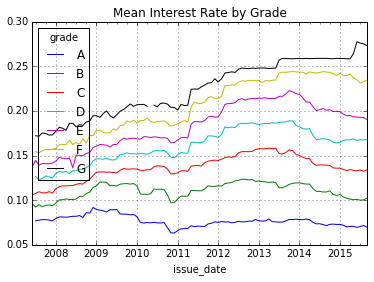

In [131]:
int_by_grade_and_time.loc[:,'A':'G'].plot(title='Mean Interest Rate by Grade')
plt.savefig('mean_int_over_time.png')

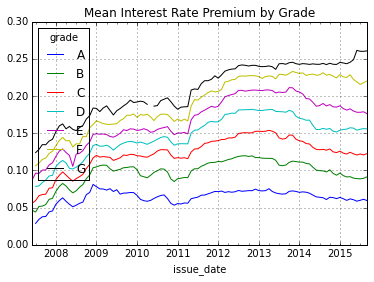

In [143]:
data.groupby(['issue_date', 'grade'])['int_premium'].mean().unstack().plot(title='Mean Interest Rate Premium by Grade')
plt.savefig('mean_int_prem_over_time.png')

In [82]:
(data['int_rate']-.05)/.2

0     0.2825
1     0.5135
2     0.5480
3     0.4245
4     0.1450
5     0.6820
6     0.8140
7     0.3845
8     0.4825
9     0.3845
10    0.4245
11    0.2455
12    0.2825
13    0.5645
14    0.5135
...
208812    0.9495
208813    1.0415
208814    0.5495
208815    0.3695
208816    0.4995
208817    0.7495
208818    0.4655
208819    0.6070
208820    0.8495
208821    0.4330
208822    0.9995
208823    0.3695
208824    0.5495
208825    0.0515
208826    0.1835
Name: int_rate, Length: 208827, dtype: float64

In [133]:
bad_loans = data['loan_status_binary'] == 0
good_loans = data['loan_status_binary'] == 1

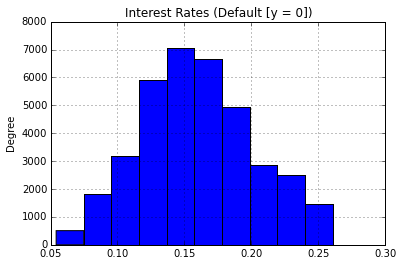

In [140]:
data[bad_loans]['int_rate'].plot(kind='hist', title='Interest Rates (Default [y = 0])')
plt.savefig('int_rate_hist_neg.png')

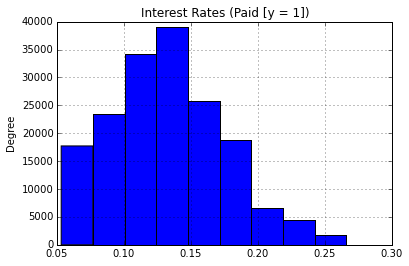

In [139]:
data[good_loans]['int_rate'].plot(kind='hist', title='Interest Rates (Paid [y = 1])')
plt.savefig('int_rate_hist_pos.png')